 # Multi Layer Perceptron
 Technically, we're building a perceptron with one hidden layer.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from termcolor import colored
from tensorflow.keras.datasets import mnist

####  Loads the training and test data sets

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
first_image = x_train[0, :, :]
plt.imshow(first_image, cmap=plt.cm.Greys)

In [6]:
num_classes = len(np.unique(y_train))
num_classes

10

In [7]:
x_train.ndim

3

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train.shape[1:]

(28, 28)

In [12]:
input_dim = np.prod(x_train.shape[1:])
input_dim

784

### The training and test data sets are integers, ranging from 0 to 255.
### We reshape the training and test data sets to be matrices with 784 (= 28 * 28) features.

In [13]:
x_train = x_train.reshape(60000, input_dim).astype('float32')
x_test = x_test.reshape(10000, input_dim).astype('float32')

In [14]:
 x_train.shape

(60000, 784)

### Scales the training and test data to range between 0 and 1.

In [15]:
max_value = x_train.max()
x_train /= max_value  # sum += 1
x_test /= max_value

### The training and test labels are integers from 0 to 9 indicating the class label

In [16]:
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### We convert the class labels to binary class matrices

In [17]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Build the Model

In [19]:
model = Sequential()

In [20]:
input_dim

784

### Add 1st Layer

In [21]:
model.add(Dense(512, activation = 'relu', input_shape = (input_dim,)))

### Add 2nd Layer

In [22]:
model.add(Dense(num_classes, activation = 'softmax'))

## Summarize the Model

The summary includes information about:

- The layers and their order in the model.
- The output shape of each layer.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Visualize the Model

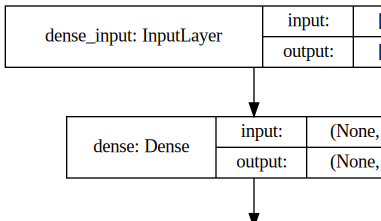

In [26]:
SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

## Train the model

### Trains the model, iterating on the training data in batches of 32 in 3 epochs.

#### Configures the model for training

In [27]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Trains the model for a fixed number of epochs (iterations on a dataset)

In [28]:
model.fit(x_train, y_train, batch_size = 32, epochs = 3, verbose = 1)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2036 - accuracy: 0.9396
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0810 - accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0541 - accuracy: 0.9824


## Model Evaluation

#### Test accuracy

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 807us/step - loss: 0.0639 - accuracy: 0.9796


[0.06391038745641708, 0.9796000123023987]

## Predicting on Test Images

In [30]:
first_test_image = x_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [31]:
model.predict(x_test[[0]])

array([[7.58057261e-09, 3.95653954e-09, 1.26128896e-06, 1.58095500e-04,
        4.81180477e-11, 1.12854536e-07, 5.25239357e-12, 9.99834538e-01,
        2.25302816e-08, 5.94850781e-06]], dtype=float32)

In [32]:
second_test_image = x_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [33]:
model.predict(x_test[[1]])

array([[6.0568077e-08, 4.1320589e-03, 9.9585563e-01, 9.9889494e-06,
        2.6165290e-11, 2.9371336e-07, 9.1884874e-07, 1.8021874e-09,
        9.2514529e-07, 4.6547601e-12]], dtype=float32)

In [34]:
model.save("model.h5", save_format='h5')